In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data = pd.read_excel("mackolik_2017_2018.xls", index_col=0)
data[['ScoreHT', 'ScoreAT']] = data.Skor.str.split(" - ", expand=True, )
data["ScoreHT"] = data["ScoreHT"].apply(pd.to_numeric)
data["ScoreAT"] = data["ScoreAT"].apply(pd.to_numeric)
data["WDL"] = data["ScoreHT"] - data["ScoreAT"]

In [2]:
def encode1(x):
    if x > 0:
        return 1
    elif x < 0:
        return 2
    else:
        return 0

In [3]:
data["WDL"] = data.apply(lambda x: encode1(x["WDL"]), axis=1)

data.drop(labels=["ScoreHT", "ScoreAT", "Skor"], axis=1, inplace=True)

In [4]:
def fonksiyon(data, takim1, takim2, feat1, feat2):
    dataT1H = data.loc[data['Home Team'].str.startswith(takim1), ["Home Team", "Away Team", feat1, feat2]]
    dataT1A = data.loc[data['Away Team'].str.startswith(takim1), ["Home Team", "Away Team", feat1, feat2]]
    dataT2H = data.loc[data['Home Team'].str.startswith(takim2), ["Home Team", "Away Team", feat1, feat2]]
    dataT2A = data.loc[data['Away Team'].str.startswith(takim2), ["Home Team", "Away Team", feat1, feat2]]

    lengthT1H = dataT1H[feat1].shape[0]
    lengthT1A = dataT1A[feat2].shape[0]
    lengthT2H = dataT2H[feat1].shape[0]
    lengthT2A = dataT2A[feat2].shape[0]

    ortT1HG = dataT1H[feat1].mean()  # takim1 home team ortalama *6
    ortT1AG = dataT1A[feat2].mean()  # takim1 away team ortalama *5

    ortT2HG = dataT2H[feat1].mean()  # takim2 home team ortalama *6
    ortT2AG = dataT2A[feat2].mean()  # takim2 away team ortalama *5

    ortT1H3 = dataT1H[feat1][lengthT1H - 3:lengthT1H].mean()  # takim1 home team ortalama son 3 maç *10
    ortT1H5 = dataT1H[feat1][lengthT1H - 5:lengthT1H].mean()  # takim1 home team ortalama son 5 maç *9
    ortT1H8 = dataT1H[feat1][lengthT1H - 8:lengthT1H].mean()  # takim1 home team ortalama son 8 maç *8
    ortT1H10 = dataT1H[feat1][lengthT1H - 10:lengthT1H].mean()  # takim1 home team ortalama son 10 maç*7

    ortT2H3 = dataT2H[feat1][lengthT2H - 3:lengthT2H].mean()  # takim2 home team ortalama son 3 maç *10
    ortT2H5 = dataT2H[feat1][lengthT2H - 5:lengthT2H].mean()  # takim2 home team ortalama son 5 maç *9
    ortT2H8 = dataT2H[feat1][lengthT2H - 8:lengthT2H].mean()  # takim2 home team ortalama son 8 maç *8
    ortT2H10 = dataT2H[feat1][lengthT2H - 10:lengthT2H].mean()  # takim2 home team ortalama son 10 maç*7

    ortT1A3 = dataT1A[feat2][lengthT1A - 3:lengthT1A].mean()  # takim1 away team ortalama son 3 maç *9
    ortT1A5 = dataT1A[feat2][lengthT1A - 5:lengthT1A].mean()  # takim1 away team ortalama son 5 maç *8
    ortT1A8 = dataT1A[feat2][lengthT1A - 8:lengthT1A].mean()  # takim1 away team ortalama son 8 maç *7
    ortT1A10 = dataT1A[feat2][lengthT1A - 10:lengthT1A].mean()  # takim1 away team ortalama son 10 maç*6

    ortT2A3 = dataT2A[feat2][lengthT2A - 3:lengthT2A].mean()  # takim2 away team ortalama son 3 maç *9
    ortT2A5 = dataT2A[feat2][lengthT2A - 5:lengthT2A].mean()  # takim2 away team ortalama son 5 maç *8
    ortT2A8 = dataT2A[feat2][lengthT2A - 8:lengthT2A].mean()  # takim2 away team ortalama son 8 maç *7
    ortT2A10 = dataT2A[feat2][lengthT2A - 10:lengthT2A].mean()  # takim2 away team ortalama son 10 maç*6

    listT1 = [ortT1HG, ortT1AG, ortT1H3, ortT1H5, ortT1H8, ortT1H10, ortT1A3, ortT1A5, ortT1A8, ortT1A10]
    listT2 = [ortT2HG, ortT2AG, ortT2H3, ortT2H5, ortT2H8, ortT2H10, ortT2A3, ortT2A5, ortT2A8, ortT2A10]
    return listT1, listT2

In [5]:
def dataFrameMaker(data, featureList, result):
    columns = ["ortT1HG", "ortT1AG", "ortT1H3", "ortT1H5", "ortT1H8", "ortT1H10", "ortT1A3",
               "ortT1A5", "ortT1A8", "ortT1A10"]
    x = []
    for i in featureList:
        for y in i:
            for j in columns:
                x.append(y + j)

    x.append("result")
    dataToplaOynamaT1 = pd.DataFrame(columns=x)

    counter = 0
    data2 = data.copy()
    for y in range(data2.shape[0], 312, -1):
        listResult = []
        for i in featureList:
            listT1, listT2 = fonksiyon(data2, data2.loc[y]["Home Team"], data2.loc[y]["Away Team"], i[0], i[1])
            listResult = listResult + listT1 + listT2

        listResult.append(data2.loc[y][result])
        dataToplaOynamaT1.loc[counter] = listResult
        counter += 1
        data2.drop(y, inplace=True)

    return dataToplaOynamaT1

In [6]:
toplaOynamaHT = [["Topla OynamaHT", "Topla OynamaAT"], ["OrtaHT", "OrtaAT"], ["İsabetli ŞutHT", "İsabetli ŞutAT"],
                 ["Ceza Sahası Dışından ŞutHT", "Ceza Sahası Dışından ŞutAT"], ["ŞutHT", "ŞutAT"],
                 ["UzaklaştırmaHT", "UzaklaştırmaAT"], ["Pas ArasıHT", "Pas ArasıAT"], ["KornerHT", "KornerAT"],
                 ["Rakip Yarı Sahada Pas İsabetiHT", "Rakip Yarı Sahada Pas İsabetiAT"],
                 ["Pas İsabetiHT", "Pas İsabetiAT"]]
dataFinalToplaOynamaHT = dataFrameMaker(data, toplaOynamaHT, "Topla OynamaHT")

In [7]:
toplaOynamaAT = [["Topla OynamaAT", "Topla OynamaHT"], ["OrtaAT", "OrtaHT"], ["İsabetli ŞutAT", "İsabetli ŞutHT"],
                 ["Ceza Sahası Dışından ŞutAT", "Ceza Sahası Dışından ŞutHT"], ["ŞutAT", "ŞutHT"],
                 ["UzaklaştırmaAT", "UzaklaştırmaHT"], ["Pas ArasıAT", "Pas ArasıHT"], ["KornerAT", "KornerHT"],
                 ["Rakip Yarı Sahada Pas İsabetiAT", "Rakip Yarı Sahada Pas İsabetiHT"],
                 ["Pas İsabetiAT", "Pas İsabetiHT"]]
dataFinalToplaOynamaAT = dataFrameMaker(data, toplaOynamaAT, "Topla OynamaHT")

In [8]:
ikiliMücadeleHT = [["İkili Mücadele KazanmaHT", "İkili Mücadele KazanmaAT"], ["Topla OynamaHT", "Topla OynamaAT"],
                   ["Hava TopuHT", "Hava TopuAT"],
                   ["Rakip Yarı Sahada Pas İsabetiHT", "Rakip Yarı Sahada Pas İsabetiAT"],
                   ["FaulHT", "FaulAT"], ["ŞutHT", "ŞutAT"], ["İsabetli ŞutHT", "İsabetli ŞutAT"],
                   ["Orta İsabetiHT", "Orta İsabetiAT"]]
dataFinalİkiliMücadeleHT = dataFrameMaker(data, ikiliMücadeleHT, "İkili Mücadele KazanmaHT")


In [9]:
ikiliMücadeleAT = [["İkili Mücadele KazanmaAT", "İkili Mücadele KazanmaHT"], ["Topla OynamaAT", "Topla OynamaHT"],
                   ["Hava TopuAT", "Hava TopuHT"],
                   ["Rakip Yarı Sahada Pas İsabetiAT", "Rakip Yarı Sahada Pas İsabetiHT"],
                   ["FaulAT", "FaulHT"], ["ŞutAT", "ŞutHT"], ["İsabetli ŞutAT", "İsabetli ŞutHT"],
                   ["Orta İsabetiAT", "Orta İsabetiHT"]]
dataFinalİkiliMücadeleAT = dataFrameMaker(data, ikiliMücadeleAT, "İkili Mücadele KazanmaAT")


In [10]:
havaTopuHT = [["Hava TopuHT", "Hava TopuAT"], ["Topla OynamaHT", "Topla OynamaAT"],
              ["İkili Mücadele KazanmaHT", "İkili Mücadele KazanmaAT"], ["Pas İsabetiHT", "Pas İsabetiAT"],
              ["ŞutHT", "ŞutAT"], ["İsabetli ŞutHT", "İsabetli ŞutAT"]]
dataFinalHavaTopuHT = dataFrameMaker(data, havaTopuHT, "Hava TopuHT")


In [11]:
havaTopuAT = [["Hava TopuAT", "Hava TopuHT"], ["Topla OynamaAT", "Topla OynamaHT"],
              ["İkili Mücadele KazanmaAT", "İkili Mücadele KazanmaHT"], ["Pas İsabetiAT", "Pas İsabetiHT"],
              ["ŞutAT", "ŞutHT"], ["İsabetli ŞutAT", "İsabetli ŞutHT"]]
dataFinalHavaTopuAT = dataFrameMaker(data, havaTopuAT, "Hava TopuAT")


In [12]:
pasİsabetiHT = [["Pas İsabetiHT", "Pas İsabetiAT"], ["OrtaHT", "OrtaAT"], ["İsabetli ŞutHT", "İsabetli ŞutAT"],
                ["Ceza Sahası Dışından ŞutHT", "Ceza Sahası Dışından ŞutAT"], ["ŞutHT", "ŞutAT"],
                ["Topla OynamaHT", "Topla OynamaAT"], ["OrtaHT", "OrtaAT"], ["Kırmızı KartHT", "Kırmızı KartAT"],
                ["Rakip Yarı Sahada Pas İsabetiHT", "Rakip Yarı Sahada Pas İsabetiAT"],
                ["Hava TopuHT", "Hava TopuAT"]]
dataFinalPasİsabetiHT = dataFrameMaker(data, pasİsabetiHT, "Pas İsabetiHT")


In [13]:
pasİsabetiAT = [["Pas İsabetiAT", "Pas İsabetiHT"], ["OrtaAT", "OrtaHT"], ["İsabetli ŞutAT", "İsabetli ŞutHT"],
                ["Ceza Sahası Dışından ŞutAT", "Ceza Sahası Dışından ŞutHT"], ["ŞutAT", "ŞutHT"],
                ["Topla OynamaAT", "Topla OynamaHT"], ["OrtaAT", "OrtaHT"], ["Kırmızı KartAT", "Kırmızı KartHT"],
                ["Rakip Yarı Sahada Pas İsabetiAT", "Rakip Yarı Sahada Pas İsabetiHT"],
                ["Hava TopuAT", "Hava TopuHT"]]
dataFinalPasİsabetiAT = dataFrameMaker(data, pasİsabetiAT, "Pas İsabetiAT")



In [14]:
rakipYarıSahadaPasİsabetiHT = [["Rakip Yarı Sahada Pas İsabetiHT", "Rakip Yarı Sahada Pas İsabetiAT"],
                               ["OrtaHT", "OrtaAT"], ["İsabetli ŞutHT", "İsabetli ŞutAT"],
                               ["Ceza Sahası Dışından ŞutHT", "Ceza Sahası Dışından ŞutAT"], ["ŞutHT", "ŞutAT"],
                               ["Kırmızı KartHT", "Kırmızı KartAT"], ["Orta İsabetiHT", "Orta İsabetiAT"],
                               ["Pas İsabetiHT", "Pas İsabetiAT"], ["Topla OynamaHT", "Topla OynamaAT"],
                               ["Hava TopuHT", "Hava TopuAT"], ["İkili Mücadele KazanmaHT", "İkili Mücadele KazanmaAT"]]
dataFinalRakipYarıSahadaPasİsabetiHT = dataFrameMaker(data, rakipYarıSahadaPasİsabetiHT, "Rakip Yarı Sahada Pas İsabetiHT")



In [15]:
# kornerAT = [["KornerAT", "KornerHT"], ["OrtaAT", "OrtHT"], ["İsabetli ŞutAT", "İsabetli ŞutHT"],
#             ["Ceza Sahası Dışından ŞutAT", "Ceza Sahası Dışından ŞutHT"], ["ŞutAT", "ŞutHT"],
#             ["Rakip Yarı Sahada Pas İsabetiAT", "Rakip Yarı Sahada Pas İsabetiHT"],  # isoya sorulup atılacak
#             ["Pas İsabetiAT", "Pas İsabetiHT"], ["Topla OynamaAT", "Topla OynamaHT"]]
# dataFinalKornerAT = dataFrameMaker(data, kornerAT, "KornerAT")



In [16]:
uzaklaştırmaAT = [["UzaklaştırmaAT", "UzaklaştırmaHT"], ["OrtaAT", "OrtaHT"],
                  ["Ceza Sahası Dışından ŞutAT", "Ceza Sahası Dışından ŞutHT"], ["ŞutAT", "ŞutHT"],
                  ["Sarı KartAT", "Sarı KartHT"], ["FaulAT", "FaulHT"], ["Pas ArasıAT", "Pas ArasıHT"],
                  # mape yüksek çıkıyor
                  ["KornerAT", "KornerHT"], ["Topla OynamaAT", "Topla OynamaHT"]]
dataFinalUzaklaştırmaAT = dataFrameMaker(data, uzaklaştırmaAT, "UzaklaştırmaAT")


In [17]:
uzaklaştırmaHT = [["UzaklaştırmaHT", "UzaklaştırmaAT"], ["OrtaHT", "OrtaAT"],
                  ["Ceza Sahası Dışından ŞutHT", "Ceza Sahası Dışından ŞutAT"], ["ŞutHT", "ŞutAT"],
                  ["Sarı KartHT", "Sarı KartAT"], ["FaulHT", "FaulAT"], ["Pas ArasıHT", "Pas ArasıAT"],
                  # mape yüksek çıkıyor
                  ["KornerHT", "KornerAT"], ["Topla OynamaHT", "Topla OynamaAT"]]  # 0.57
dataFinalUzaklaştırmaHT = dataFrameMaker(data, uzaklaştırmaHT, "UzaklaştırmaHT")


In [18]:

topKapmaBaşarısıAT = [["Top Kapma BaşarısıAT", "Top Kapma BaşarısıHT"], ["Pas ArasıAT", "Pas ArasıHT"],
                      ["UzaklaştırmaAT", "UzaklaştırmaHT"], ["OrtaAT", "OrtaHT"]]
dataFinalTopKapmaBaşarısıAT = dataFrameMaker(data, topKapmaBaşarısıAT, "Top Kapma BaşarısıAT")



In [19]:
topKapmaBaşarısıHT = [["Top Kapma BaşarısıHT", "Top Kapma BaşarısıAT"], ["Pas ArasıHT", "Pas ArasıAT"],
                      ["UzaklaştırmaHT", "UzaklaştırmaAT"], ["OrtaHT", "OrtaAT"]]
dataFinalTopKapmaBaşarısıHT = dataFrameMaker(data, topKapmaBaşarısıHT, "Top Kapma BaşarısıHT")



In [20]:
rakipYarıSahadaPasİsabetiAT = [["Rakip Yarı Sahada Pas İsabetiAT", "Rakip Yarı Sahada Pas İsabetiHT"],
                               ["OrtaAT", "OrtaHT"], ["İsabetli ŞutAT", "İsabetli ŞutHT"],
                               ["Ceza Sahası Dışından ŞutAT", "Ceza Sahası Dışından ŞutHT"], ["ŞutAT", "ŞutHT"],
                               ["Kırmızı KartAT", "Kırmızı KartHT"], ["Orta İsabetiAT", "Orta İsabetiHT"],
                               ["Pas İsabetiAT", "Pas İsabetiHT"], ["Topla OynamaAT", "Topla OynamaHT"],
                               ["Hava TopuAT", "Hava TopuHT"], ["İkili Mücadele KazanmaAT", "İkili Mücadele KazanmaHT"]]
dataFinalRakipYarıSahadaPasİsabetiAT = dataFrameMaker(data, rakipYarıSahadaPasİsabetiAT, "Rakip Yarı Sahada Pas İsabetiAT")


In [21]:
isabetliŞutAT = [["İsabetli ŞutAT", "İsabetli ŞutHT"], ["Orta İsabetiAT", "Orta İsabetiHT"],
                 ["OrtaAT", "OrtaHT"], ["ŞutAT", "ŞutHT"], ["Topla OynamaAT", "Topla OynamaHT"],
                 ["Ceza Sahası Dışından ŞutAT", "Ceza Sahası Dışından ŞutHT"],
                 ["Rakip Yarı Sahada Pas İsabetiAT", "Rakip Yarı Sahada Pas İsabetiHT"],  # y_test y_pred ters 0.50
                 ["KornerAT", "KornerHT"], ["Pas İsabetiAT", "Pas İsabetiHT"],
                 ["Hava TopuAT", "Hava TopuHT"], ["İkili Mücadele KazanmaAT", "İkili Mücadele KazanmaHT"]]
dataFinalİsabetliŞutAT = dataFrameMaker(data, isabetliŞutAT, "İsabetli ŞutAT")



In [22]:
ortaHT = [["OrtaHT", "OrtaAT"], ["İsabetli ŞutHT", "İsabetli ŞutAT"], ["ŞutHT", "ŞutAT"],
          ["Ceza Sahası Dışından ŞutHT", "Ceza Sahası Dışından ŞutAT"],
          ["UzaklaştırmaHT", "UzaklaştırmaAT"], ["KornerHT", "KornerAT"],  # 0.42
          ["Rakip Yarı Sahada Pas İsabetiAT", "Rakip Yarı Sahada Pas İsabetiHT"],
          ["Topla OynamaHT", "Topla OynamaAT"], ["Pas İsabetiHT", "Pas İsabetiAT"]]
dataFinalOrtaHT = dataFrameMaker(data, ortaHT, "OrtaHT")


In [23]:
şutHT = [["ŞutHT", "ŞutAT"], ["Orta İsabetiHT", "Orta İsabetiAT"], ["OrtaAT", "OrtaHT"],
         ["İsabetli ŞutHT", "İsabetli ŞutAT"], ["Ceza Sahası Dışından ŞutHT", "Ceza Sahası Dışından ŞutAT"],
         ["Rakip Yarı Sahada Pas İsabetiHT", "Rakip Yarı Sahada Pas İsabetiAT"], ["UzaklaştırmaHT", "UzaklaştırmaAT"],
         ["KornerHT", "KornerAT"], ["Pas İsabetiHT", "Pas İsabetiAT"], ["Topla OynamaHT", "Topla OynamaAT"],
         ["Hava TopuHT", "Hava TopuAT"], ["İkili Mücadele KazanmaHT", "İkili Mücadele KazanmaAT"]]
dataFinalŞutHT = dataFrameMaker(data, şutHT, "ŞutHT")


In [24]:
faulAT = [["FaulAT", "FaulHT"], ["İkili Mücadele KazanmaAT", "İkili Mücadele KazanmaHT"],
          ["UzaklaştırmaAT", "UzaklaştırmaHT"]]
dataFinalFaulAT = dataFrameMaker(data, faulAT, "FaulAT")


In [25]:

faulHT = [["FaulHT", "FaulAT"], ["İkili Mücadele KazanmaHT", "İkili Mücadele KazanmaAT"],
          ["UzaklaştırmaHT", "UzaklaştırmaAT"]]
dataFinalFaulHT = dataFrameMaker(data, faulHT, "FaulHT")


In [26]:
pasArasıAT = [["Pas ArasıAT", "Pas ArasıHT"], ["OrtaAT", "OrtaHT"],
              ["İsabetli ŞutAT", "İsabetli ŞutHT"], ["FaulAT", "FaulHT"],
              ["UzaklaştırmaAT", "UzaklaştırmaHT"], ["Top Kapma BaşarısıAT", "Top Kapma BaşarısıHT"],
              # mape yüksek çıkıyor
              ["Topla OynamaAT", "Topla OynamaHT"]]
dataFinalPasArasıAT = dataFrameMaker(data, pasArasıAT, "Pas ArasıAT")


In [27]:

pasArasıHT = [["Pas ArasıHT", "Pas ArasıAT"], ["OrtaHT", "OrtaAT"],
              ["İsabetli ŞutHT", "İsabetli ŞutAT"], ["FaulHT", "FaulAT"],
              ["UzaklaştırmaAT", "UzaklaştırmaHT"], ["Top Kapma BaşarısıAT", "Top Kapma BaşarısıHT"],
              # mape yüksek çıkıyor
              ["Topla OynamaHT", "Topla OynamaAT"]]
dataFinalPasArasıHT = dataFrameMaker(data, pasArasıHT, "Pas ArasıHT")


In [28]:
isabetliŞutHT = [["İsabetli ŞutHT", "İsabetli ŞutAT"], ["Orta İsabetiHT", "Orta İsabetiAT"],
                 ["OrtaHT", "OrtaAT"], ["ŞutHT", "ŞutAT"], ["Topla OynamaHT", "Topla OynamaAT"],
                 ["Ceza Sahası Dışından ŞutHT", "Ceza Sahası Dışından ŞutAT"],
                 ["Rakip Yarı Sahada Pas İsabetiAT", "Rakip Yarı Sahada Pas İsabetiHT"],  # y_test y_pred ters 0.46
                 ["KornerHT", "KornerAT"], ["Pas İsabetiHT", "Pas İsabetiAT"],
                 ["Hava TopuHT", "Hava TopuAT"], ["İkili Mücadele KazanmaHT", "İkili Mücadele KazanmaAT"]]
dataFinalİsabetliŞutHT = dataFrameMaker(data, isabetliŞutHT, "İsabetli ŞutHT")


In [29]:
cezaSahasıDışındanŞutAT = [["Ceza Sahası Dışından ŞutAT", "Ceza Sahası Dışından ŞutHT"], ["OrtaAT", "OrtaHT"],
                           ["İsabetli ŞutAT", "İsabetli ŞutHT"], ["ŞutAT", "ŞutHT"],
                           ["UzaklaştırmaAT", "UzaklaştırmaHT"],  # 0.61
                           ["KornerAT", "KornerHT"],
                           ["Rakip Yarı Sahada Pas İsabetiAT", "Rakip Yarı Sahada Pas İsabetiHT"],
                           ["Pas İsabetiAT", "Pas İsabetiHT"], ["Topla OynamaAT", "Topla OynamaHT"], ]

dataFinalCezaSahasıDışındanŞutAT = dataFrameMaker(data, cezaSahasıDışındanŞutAT, "Ceza Sahası Dışından ŞutAT")


In [30]:
cezaSahasıDışındanŞutHT = [["Ceza Sahası Dışından ŞutHT", "Ceza Sahası Dışından ŞutAT"], ["OrtaHT", "OrtaAT"],
                           ["İsabetli ŞutHT", "İsabetli ŞutAT"], ["ŞutHT", "ŞutAT"],
                           ["UzaklaştırmaHT", "UzaklaştırmaAT"],  # mean yüksek
                           ["KornerHT", "KornerAT"],
                           ["Rakip Yarı Sahada Pas İsabetiAT", "Rakip Yarı Sahada Pas İsabetiHT"],  # 0.50
                           ["Pas İsabetiHT", "Pas İsabetiAT"], ["Topla OynamaHT", "Topla OynamaAT"], ]

dataFinalCezaSahasıDışındanŞutHT = dataFrameMaker(data, cezaSahasıDışındanŞutHT, "Ceza Sahası Dışından ŞutHT")


In [31]:
şutAT = [["ŞutAT", "ŞutHT"], ["Orta İsabetiAT", "Orta İsabetiHT"], ["OrtaAT", "OrtaHT"],
         ["İsabetli ŞutAT", "İsabetli ŞutHT"], ["Ceza Sahası Dışından ŞutAT", "Ceza Sahası Dışından ŞutHT"],
         ["Rakip Yarı Sahada Pas İsabetiAT", "Rakip Yarı Sahada Pas İsabetiHT"], ["UzaklaştırmaAT", "UzaklaştırmaHT"],
         ["KornerAT", "KornerHT"], ["Pas İsabetiAT", "Pas İsabetiHT"], ["Topla OynamaAT", "Topla OynamaHT"],
         ["Hava TopuAT", "Hava TopuHT"], ["İkili Mücadele KazanmaAT", "İkili Mücadele KazanmaHT"]]
dataFinalŞutAT = dataFrameMaker(data, şutAT, "ŞutAT")


In [32]:
ortaAT = [["OrtaAT", "OrtaHT"], ["İsabetli ŞutAT", "İsabetli ŞutHT"], ["ŞutAT", "ŞutHT"],
          ["Ceza Sahası Dışından ŞutAT", "Ceza Sahası Dışından ŞutHT"],
          ["UzaklaştırmaAT", "UzaklaştırmaHT"], ["KornerAT", "KornerHT"],  # 0.36
          ["Rakip Yarı Sahada Pas İsabetiAT", "Rakip Yarı Sahada Pas İsabetiHT"],
          ["Topla OynamaAT", "Topla OynamaHT"], ["Pas İsabetiAT", "Pas İsabetiHT"]]
dataFinalOrtaAT = dataFrameMaker(data, ortaAT, "OrtaAT")


In [33]:
ortaİsabetiHT = [["Orta İsabetiHT", "Orta İsabetiAT"], ["İsabetli ŞutHT", "İsabetli ŞutAT"],
                 ["ŞutHT", "ŞutAT"], ["Rakip Yarı Sahada Pas İsabetiHT", "Rakip Yarı Sahada Pas İsabetiAT"],
                 ["İkili Mücadele KazanmaHT", "İkili Mücadele KazanmaAT"]]  # sonuç mantıklı çıkmadı
dataFinalOrtaİsabetiHT = dataFrameMaker(data, ortaİsabetiHT, "Orta İsabetiHT")


In [34]:
ortaİsabetiAT = [["Orta İsabetiAT", "Orta İsabetiHT"], ["İsabetli ŞutAT", "İsabetli ŞutHT"],
                 ["ŞutAT", "ŞutHT"], ["Rakip Yarı Sahada Pas İsabetiAT", "Rakip Yarı Sahada Pas İsabetiHT"],
                 ["İkili Mücadele KazanmaAT", "İkili Mücadele KazanmaHT"]]  # sonuç mantıklı çıkmadı
dataFinalOrtaİsabetiAT = dataFrameMaker(data, ortaİsabetiAT, "Orta İsabetiAT")

In [35]:
def dataFinal(data3):
    data3.result = data3.result.astype("int64")
    x = data3.drop(columns=["result"])
    y = data3.loc[:, "result"]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    regr = RandomForestClassifier()
    regr.fit(x_train, y_train)
    return regr


In [36]:
FeatureList=[dataFinalToplaOynamaHT,"dataFinalToplaOynamaHT","Topla OynamaHT",dataFinalToplaOynamaAT,"dataFinalToplaOynamaAT","Topla OynamaAT",
             dataFinalİkiliMücadeleHT,"dataFinalİkiliMücadeleHT","İkili MücadeleHT",dataFinalİkiliMücadeleAT,"dataFinalİkiliMücadeleAT","İkili MücadeleAT",
             dataFinalHavaTopuHT,"dataFinalHavaTopuHT","Hava TopuHT",dataFinalHavaTopuAT,"dataFinalHavaTopuAT","Hava TopuAT",
             dataFinalPasİsabetiHT,"dataFinalPasİsabetiHT","Pas İsabetiHT",dataFinalPasİsabetiAT,"dataFinalPasİsabetiAT","Pas İsabetAT",
             dataFinalRakipYarıSahadaPasİsabetiHT,"dataFinalRakipYarıSahadaPasİsabetiHT","Rakip Yarı Sahada Pas İsabetiHT",dataFinalRakipYarıSahadaPasİsabetiAT,"dataFinalRakipYarıSahadaPasİsabetiAT","Rakip Yarı Sahada Pas İsabetiAT",
             dataFinalTopKapmaBaşarısıHT,"dataFinalTopKapmaBaşarısıHT","Top Kapma BaşarısıHT",dataFinalTopKapmaBaşarısıAT,"dataFinalTopKapmaBaşarısıAT","Top Kapma Başarısı AT",
             dataFinalUzaklaştırmaHT,"dataFinalUzaklaştırmaHT","UzaklaştırmaHT",dataFinalUzaklaştırmaAT,"dataFinalUzaklaştırmaAT","UzaklaştırmaAT",
             dataFinalPasArasıHT,"dataFinalPasArasıHT","Pas ArasıHT",dataFinalPasArasıAT,"dataFinalPasArasıAT","Pas ArasıAT",
             dataFinalFaulHT,"dataFinalFaulHT","FaulHT",dataFinalFaulAT,"dataFinalFaulAT","FaulAT",
             dataFinalŞutHT,"dataFinalŞutHT","ŞutHT",dataFinalŞutAT,"dataFinalŞutAT","ŞutAT",
             dataFinalCezaSahasıDışındanŞutHT,"dataFinalCezaSahasıDışındanŞutHT","Ceza Sahası Dışından ŞutHT",dataFinalCezaSahasıDışındanŞutAT,"dataFinalCezaSahasıDışındanŞutAT","Ceza Sahası Dışından ŞutAT",
             dataFinalİsabetliŞutHT,"dataFinalİsabetliŞutHT","İsabetli ŞutHT",dataFinalİsabetliŞutAT,"dataFinalİsabetliŞutAT","İsabetli ŞutAT",
             dataFinalOrtaHT,"dataFinalOrtaHT","OrtaHT",dataFinalOrtaAT,"dataFinalOrtaAT","OrtaAT",
             dataFinalOrtaİsabetiHT,"dataFinalOrtaİsabetiHT","Orta İsabetiHT",dataFinalOrtaİsabetiAT,"dataFinalOrtaİsabetiAT","Orta İsabetiAT"]



In [37]:

regrList= {}
print(len(FeatureList))
for i in range(0, len(FeatureList),3):
    print(FeatureList[i+2])
    regrList[FeatureList[i+1]]=dataFinal(FeatureList[i])


84
Topla OynamaHT
Topla OynamaAT
İkili MücadeleHT
İkili MücadeleAT
Hava TopuHT
Hava TopuAT
Pas İsabetiHT
Pas İsabetAT
Rakip Yarı Sahada Pas İsabetiHT
Rakip Yarı Sahada Pas İsabetiAT
Top Kapma BaşarısıHT
Top Kapma Başarısı AT
UzaklaştırmaHT
UzaklaştırmaAT
Pas ArasıHT
Pas ArasıAT
FaulHT
FaulAT
ŞutHT
ŞutAT
Ceza Sahası Dışından ŞutHT
Ceza Sahası Dışından ŞutAT
İsabetli ŞutHT
İsabetli ŞutAT
OrtaHT
OrtaAT
Orta İsabetiHT
Orta İsabetiAT


In [38]:
def returnFeaturePredictions(regrList,FeatureList):
    predictResults={}
    resultColumns=[]
    results=[]
    for key in regrList:
        for i in range(0, len(FeatureList),3):
            if(FeatureList[i+1]==key):
                predictElement= FeatureList[i].iloc[-1].copy()
                predictElement.drop("result",inplace=True)
                predictElement=predictElement.values
                predictElement=predictElement.reshape(1,-1)
                result=regrList[key].predict(predictElement)
                resultColumns.append(FeatureList[i+2])
                results.append(result)
    print(resultColumns)
    resultDataFrame=pd.DataFrame(columns=resultColumns)
    resultDataFrame.loc[0]=results
    
    return resultDataFrame
    
               

In [39]:

resultDataFrame=returnFeaturePredictions(regrList,FeatureList)
print(resultDataFrame)

['Topla OynamaHT', 'Topla OynamaAT', 'İkili MücadeleHT', 'İkili MücadeleAT', 'Hava TopuHT', 'Hava TopuAT', 'Pas İsabetiHT', 'Pas İsabetAT', 'Rakip Yarı Sahada Pas İsabetiHT', 'Rakip Yarı Sahada Pas İsabetiAT', 'Top Kapma BaşarısıHT', 'Top Kapma Başarısı AT', 'UzaklaştırmaHT', 'UzaklaştırmaAT', 'Pas ArasıHT', 'Pas ArasıAT', 'FaulHT', 'FaulAT', 'ŞutHT', 'ŞutAT', 'Ceza Sahası Dışından ŞutHT', 'Ceza Sahası Dışından ŞutAT', 'İsabetli ŞutHT', 'İsabetli ŞutAT', 'OrtaHT', 'OrtaAT', 'Orta İsabetiHT', 'Orta İsabetiAT']
  Topla OynamaHT Topla OynamaAT İkili MücadeleHT İkili MücadeleAT Hava TopuHT  \
0           [66]           [66]             [48]             [51]        [50]   

  Hava TopuAT Pas İsabetiHT Pas İsabetAT Rakip Yarı Sahada Pas İsabetiHT  \
0        [50]          [89]         [75]                            [76]   

  Rakip Yarı Sahada Pas İsabetiAT  ... ŞutHT ŞutAT Ceza Sahası Dışından ŞutHT  \
0                            [56]  ...   [9]   [6]                        [5]   

  Ceza

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report,f1_score,accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [42]:
data2 = pd.read_excel("mackolik_2017_2018.xls", index_col=0)

In [43]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612 entries, 1 to 612
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Home Team                        612 non-null    object 
 1   Away Team                        612 non-null    object 
 2   Skor                             612 non-null    object 
 3   Tarih                            612 non-null    object 
 4   Topla OynamaHT                   612 non-null    float64
 5   Topla OynamaAT                   612 non-null    float64
 6   İkili Mücadele KazanmaHT         612 non-null    float64
 7   İkili Mücadele KazanmaAT         612 non-null    float64
 8   Hava TopuHT                      612 non-null    float64
 9   Hava TopuAT                      612 non-null    float64
 10  Pas İsabetiHT                    612 non-null    float64
 11  Pas İsabetiAT                    612 non-null    float64
 12  Rakip Yarı Sahada Pas 

In [44]:
data = data2.drop(columns = ["Home Team","Away Team", 'Tarih'])

In [45]:
data[['ScoreHT','ScoreAT']] = data.Skor.str.split(" - ",expand=True,)
data

,Skor,Topla OynamaHT,Topla OynamaAT,İkili Mücadele KazanmaHT,İkili Mücadele KazanmaAT,Hava TopuHT,Hava TopuAT,Pas İsabetiHT,Pas İsabetiAT,Rakip Yarı Sahada Pas İsabetiHT,...,İsabetli ŞutHT,İsabetli ŞutAT,OrtaHT,OrtaAT,Orta İsabetiHT,Orta İsabetiAT,OfsaytHT,OfsaytAT,ScoreHT,ScoreAT
1,4 - 1,63.3,36.7,51.1,48.9,28.6,71.4,86.8,75.5,78.0,...,8,2,10,17,40.0,17.6,5,2,4,1
2,1 - 0,50.1,49.9,48.7,51.3,53.5,46.5,78.2,77.4,58.2,...,2,0,17,15,47.1,6.7,1,1,1,0
3,2 - 0,50.5,49.5,42.4,57.6,48.0,52.0,78.7,72.3,67.6,...,4,1,17,13,23.5,30.8,1,2,2,0
4,3 - 1,38.0,62.0,54.6,45.4,48.3,51.7,71.5,82.8,54.8,...,4,5,12,21,41.7,23.8,1,1,3,1
5,1 - 3,61.3,38.7,62.1,37.9,71.4,28.6,90.2,81.3,78.8,...,7,3,36,15,13.9,33.3,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,0 - 2,48.8,51.2,51.6,48.4,55.6,44.4,89.1,89.2,72.5,...,7,6,26,20,23.1,10.0,1,4,0,2
609,0 - 0,61.1,38.9,49.2,50.8,56.5,43.5,85.8,79.8,78.4,...,7,5,18,15,16.7,13.3,2,1,0,0
610,2 - 3,54.8,45.2,56.3,43.8,51.6,48.4,83.4,80.7,70.6,...,5,8,22,14,40.9,50.0,2,1,2,3
611,1 - 1,57.1,42.9,42.3,57.7,27.3,72.7,84.9,82.3,75.8,...,4,7,10,19,20.0,42.1,2,3,1,1


In [46]:
data["ScoreHT"] = data["ScoreHT"].apply(pd.to_numeric)
data["ScoreAT"] = data["ScoreAT"].apply(pd.to_numeric)

In [47]:
data["WDL"] = data["ScoreHT"]-data["ScoreAT"]

In [48]:
def encode(x):
    if x > 0:
        return 1
    elif x < 0:
        return 2
    else:
        return 0

data["WDL"] = data.apply(lambda x: encode(x["WDL"]), axis = 1)
data["WDL"]

1      1
2      1
3      1
4      1
5      2
      ..
608    2
609    0
610    2
611    0
612    2
Name: WDL, Length: 612, dtype: int64

In [49]:
data.drop(labels = ["ScoreHT","ScoreAT","Skor"], axis = 1,inplace=True)

In [51]:
data = data[['Topla OynamaHT', 'Topla OynamaAT', 'İkili Mücadele KazanmaHT',
       'İkili Mücadele KazanmaAT', 'Hava TopuHT', 'Hava TopuAT',
       'Pas İsabetiHT', 'Pas İsabetiAT', 'Rakip Yarı Sahada Pas İsabetiHT',
       'Rakip Yarı Sahada Pas İsabetiAT', 'Top Kapma BaşarısıHT',
       'Top Kapma BaşarısıAT', 'UzaklaştırmaHT', 'UzaklaştırmaAT',
       'Pas ArasıHT', 'Pas ArasıAT', 'FaulHT', 'FaulAT', 'ŞutHT', 'ŞutAT',
       'Ceza Sahası Dışından ŞutHT', 'Ceza Sahası Dışından ŞutAT',
       'İsabetli ŞutHT', 'İsabetli ŞutAT', 'OrtaHT', 'OrtaAT',
       'Orta İsabetiHT', 'Orta İsabetiAT',"WDL"]]

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612 entries, 1 to 612
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Topla OynamaHT                   612 non-null    float64
 1   Topla OynamaAT                   612 non-null    float64
 2   İkili Mücadele KazanmaHT         612 non-null    float64
 3   İkili Mücadele KazanmaAT         612 non-null    float64
 4   Hava TopuHT                      612 non-null    float64
 5   Hava TopuAT                      612 non-null    float64
 6   Pas İsabetiHT                    612 non-null    float64
 7   Pas İsabetiAT                    612 non-null    float64
 8   Rakip Yarı Sahada Pas İsabetiHT  612 non-null    float64
 9   Rakip Yarı Sahada Pas İsabetiAT  612 non-null    float64
 10  Top Kapma BaşarısıHT             612 non-null    float64
 11  Top Kapma BaşarısıAT             612 non-null    float64
 12  UzaklaştırmaHT        

In [66]:
X = data.iloc[:,:28]
y = data["WDL"]

In [67]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier() 
model.fit(X,y)

ExtraTreesClassifier()

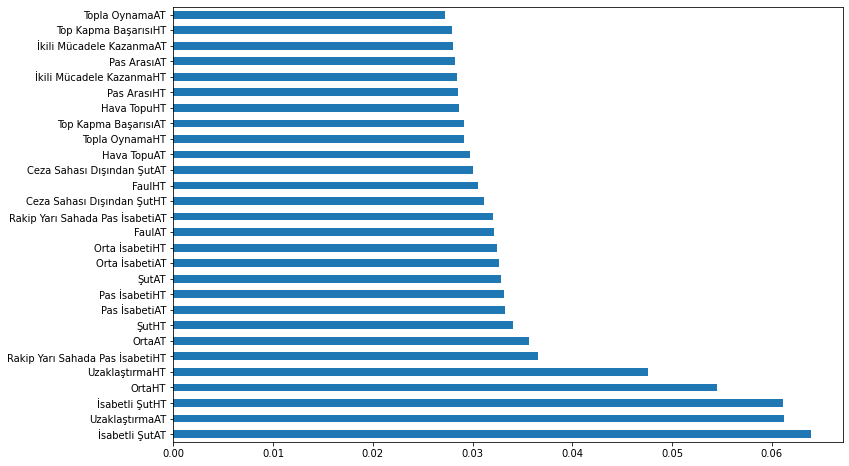

In [68]:
feature_importances = pd.Series(model.feature_importances_, index= X.columns)
plt.figure(figsize=(12,8))
feature_importances.nlargest(28).plot(kind='barh')
plt.show()

In [69]:
def split_data(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
    return X_train, X_test, y_train, y_test

In [70]:
def MMScaler(X_train,X_test):
    scaler = MinMaxScaler()
    X_ND_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_ND_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    return X_ND_train, X_ND_test

In [71]:
def classificationPredict(X_train,y_train):
    nfolds = 5
    cV = StratifiedKFold(n_splits=nfolds, shuffle=True)
    param_grid = {
        'n_estimators' : [100],
        'criterion' : ['entropy','gini'],
        'max_features' : [0.2,'sqrt',1., None, 'auto'],
        'class_weight' : ['balanced', 'balanced_subsample', None]
        }
    
    clasf = RandomForestClassifier()
    cvclasf = GridSearchCV(clasf, param_grid, verbose=0,refit=True,cv=cV, scoring='f1_weighted', n_jobs=4)
    
    # Fit GridSearch
    cvclasf.fit(X_train,y_train)
    # Take the best classifier
    bclasf = cvclasf.best_estimator_
    # Print out best parameters chosen for given model.
    print("%d-fold best CV params: %s" % (nfolds,cvclasf.best_params_))
    
    return bclasf

In [72]:
def classModel(X_train, y_train):
    clasf = classificationPredict(X_train, y_train)
    return clasf

In [73]:
X_train, X_test, y_train, y_test = split_data(X, y)

In [74]:
clasf= classModel(X_train, y_train)

5-fold best CV params: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': None, 'n_estimators': 100}


In [75]:
y_pred = clasf.predict(X_test)


In [76]:
y_predOneMatch= clasf.predict(resultDataFrame)

In [77]:
print(y_predOneMatch)

[1]
